In [1]:
import numpy as np
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
sns.set_style("whitegrid")

In [2]:
boston_dataset = load_boston()

In [3]:
type(boston_dataset)

sklearn.utils.Bunch

In [4]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [5]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
data = pd.DataFrame(data = boston_dataset.data , columns = boston_dataset.feature_names)
data['PRICE'] = boston_dataset.target

In [7]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

In [10]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [12]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


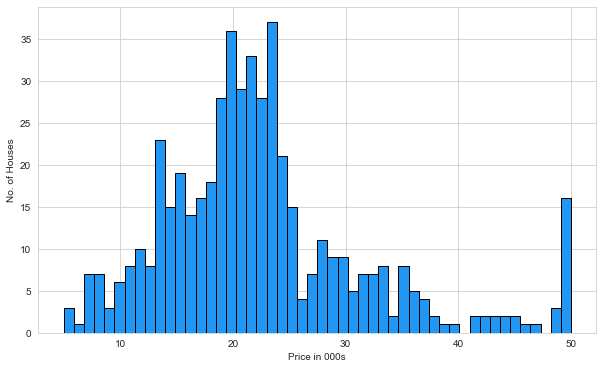

In [13]:
plt.figure(figsize = (10 , 6))
plt.hist(data['PRICE'] , bins = 50 , ec = 'black' , color = '#2196F3')
plt.xlabel('Price in 000s')
plt.ylabel('No. of Houses')
plt.show()

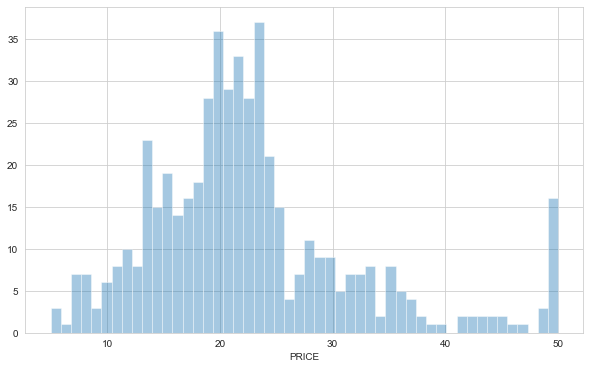

In [14]:
plt.figure(figsize = (10 , 6))
sns.distplot(data['PRICE'] , bins = 50 , kde = False , hist = True)
plt.show()

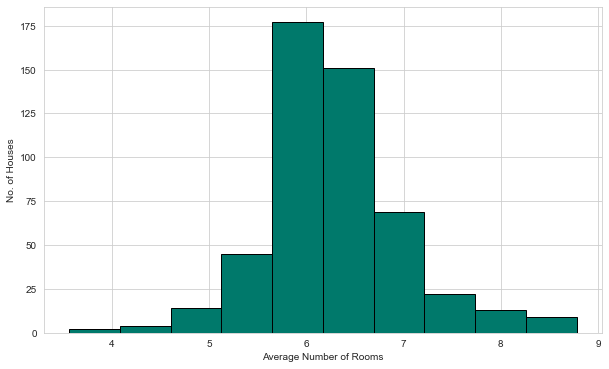

In [15]:
plt.figure(figsize = (10 , 6))
plt.hist(data['RM']  , ec = 'black' , color = '#00796b')
plt.xlabel('Average Number of Rooms')
plt.ylabel('No. of Houses')
plt.show()

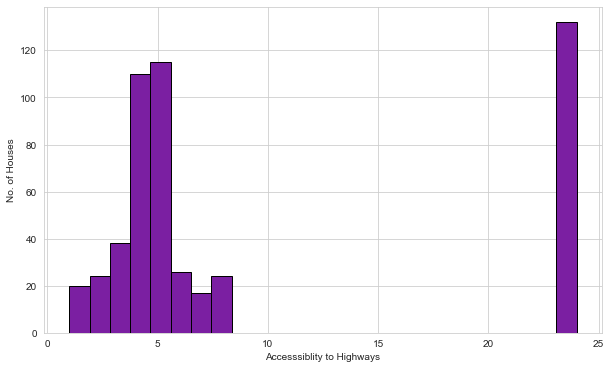

In [16]:
plt.figure(figsize = (10 , 6))
plt.hist(data['RAD']  , ec = 'black' ,bins = 25 , color = '#7b1fa2')
plt.xlabel('Accesssiblity to Highways')
plt.ylabel('No. of Houses')
plt.show()

In [17]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [18]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [19]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

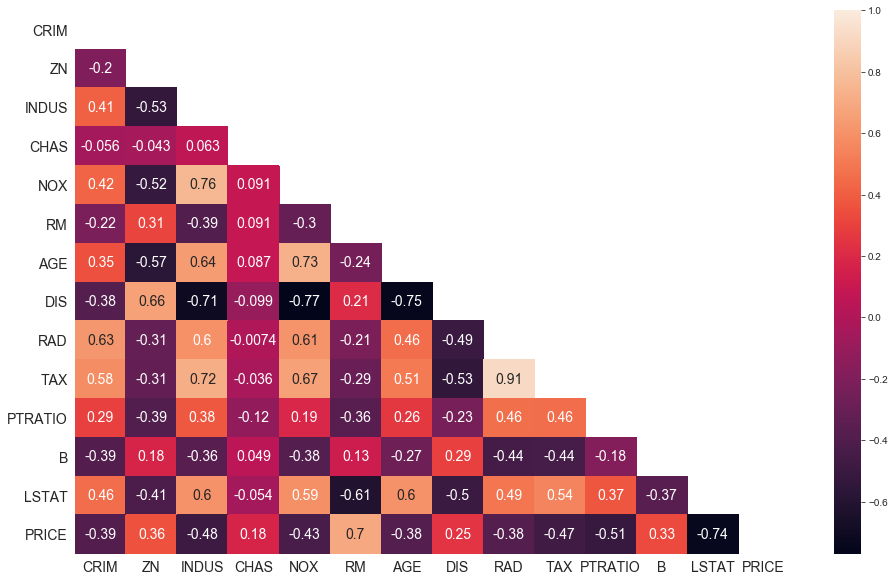

In [20]:
plt.figure(figsize = (16 , 10))
sns.heatmap(data.corr() , mask = mask , annot = True  , annot_kws = {'size':14})
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

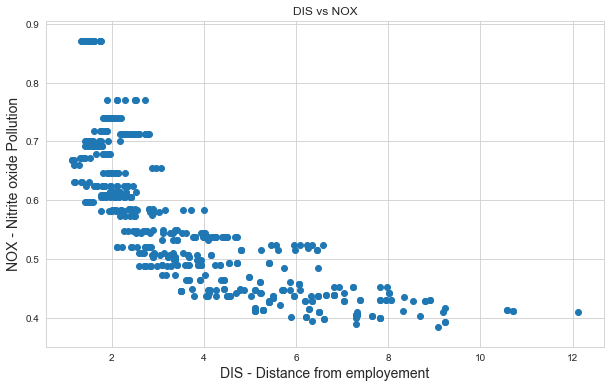

In [21]:
max_dis_corr = data['NOX'].corr(data['DIS'])
plt.figure(figsize = (10  ,6))
plt.scatter(x = data['DIS'] , y = data['NOX'])
plt.title('DIS vs NOX')
plt.xlabel('DIS - Distance from employement' , fontsize = 14)
plt.ylabel('NOX - Nitrite oxide Pollution' , fontsize = 14)
plt.show()

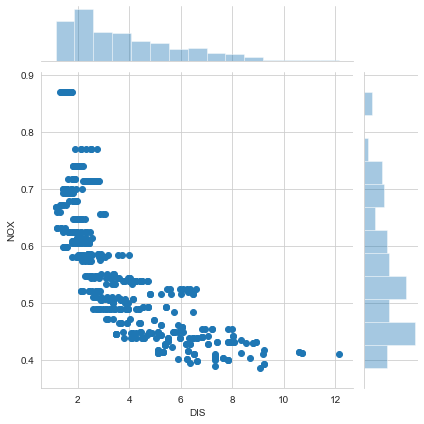

In [22]:
sns.jointplot(x = data['DIS'] , y = data['NOX'])
plt.show()

C:\Users\vaibh\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


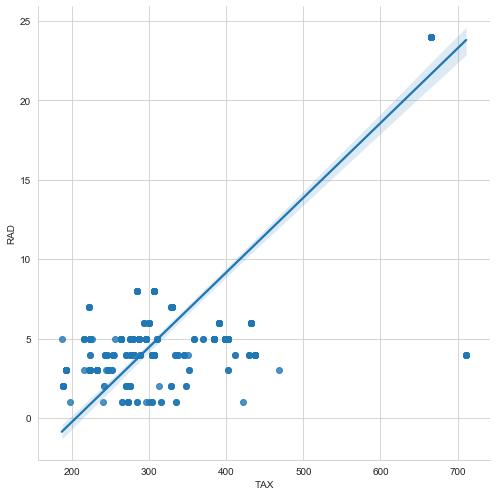

In [23]:
sns.lmplot(x = 'TAX' , y = 'RAD' , data = data , size = 7)

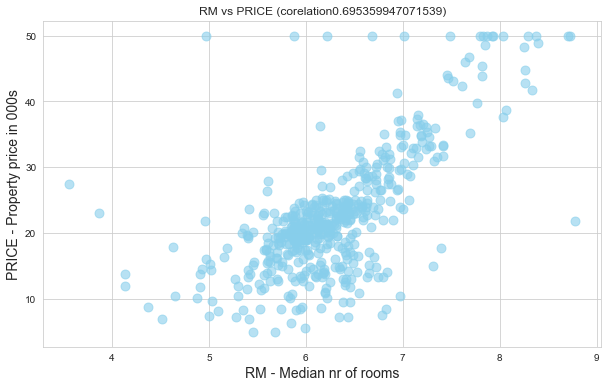

In [24]:
rm_tgt_dis_corr = data['RM'].corr(data['PRICE'])
plt.figure(figsize = (10  ,6))
plt.scatter(x = data['RM'] , y = data['PRICE'] ,alpha = 0.6 , s = 80 , color= 'skyblue' )
plt.title(f'RM vs PRICE (corelation{rm_tgt_dis_corr})')
plt.xlabel('RM - Median nr of rooms' , fontsize = 14)
plt.ylabel('PRICE - Property price in 000s' , fontsize = 14)
plt.show()

C:\Users\vaibh\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


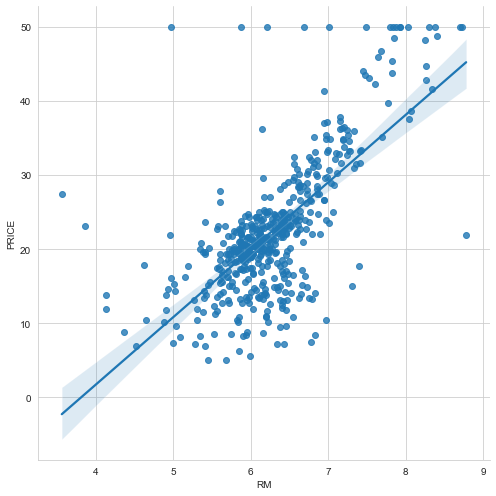

In [25]:
sns.lmplot(x = 'RM' , y = 'PRICE' , data = data , size = 7)

In [26]:
#%%time
#sns.pairplot(data)
#plt.show()

In [27]:
#sns.pairplot(data, kind = 'reg' , plot_kws = {'line_kws':{'color':'cyan'}})
#plt.show()

# Training & Test Dataset Split

In [28]:
prices = np.log(data['PRICE'])
features = data.drop('PRICE' , axis = 1)

In [29]:
X_train , X_test , y_train , y_test = train_test_split(features , prices ,
                                                      test_size = 0.2 , random_state = 10)

In [30]:
regr = LinearRegression()
regr.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
print('Intercept' , regr.intercept_)

print('Training data r-squared: ', regr.score(X_train , y_train))
print('Test data r-squared: ' , regr.score(X_test , y_test))

pd.DataFrame(data = regr.coef_ , index = X_train.columns , columns = ['coef'])

Intercept 4.05994387177519
Training data r-squared:  0.7930234826697583
Test data r-squared:  0.7446922306260724


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [32]:
data['PRICE'].skew()

1.1080984082549072

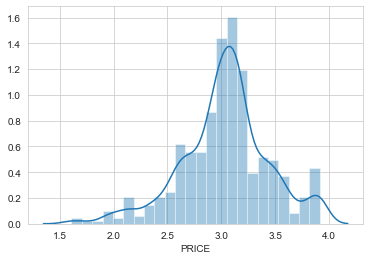

In [33]:
y_log = np.log(data['PRICE'])
sns.distplot(y_log)

C:\Users\vaibh\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


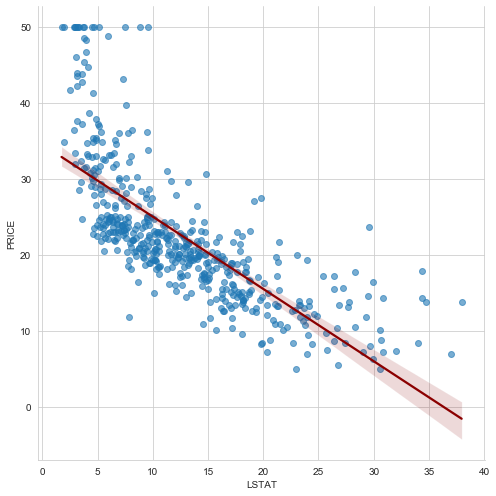

In [34]:
sns.lmplot(x = 'LSTAT' , y= 'PRICE' , data = data , size = 7 , scatter_kws = {'alpha':0.6} , line_kws = {'color':'darkred'})

# p values 7 Evaluting Coeffiecients

In [35]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train , X_incl_const)
result = model.fit()
pd.DataFrame({'coef': result.params , 'p-value': round(result.pvalues , 3)})


,coef,p-value
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


# Testing for multicollinearity

In [36]:
variance_inflation_factor(exog = X_incl_const.values , exog_idx = 1)

1.7145250443932485

In [37]:
vif = []
for i in range(X_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog = X_incl_const.values , exog_idx = i))
pd.DataFrame({'coef_name':X_incl_const.columns , 'vif':np.around(vif , 2)})     

,coef_name,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


# Model Simplification & the BIC

In [43]:
# Original
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train , X_incl_const)
result = model.fit()
org_coef = pd.DataFrame({'coef': result.params , 'p-value': round(result.pvalues , 3)})

print("BIC is",result.bic)
print("r-squared is",result.rsquared)

BIC is -139.74997769478875
r-squared is 0.7930234826697582


In [44]:
# Reduced model excluding INDUS
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS'] , axis = 1)
model = sm.OLS(y_train , X_incl_const)
result = model.fit()
coef_minus_indus = pd.DataFrame({'coef': result.params , 'p-value': round(result.pvalues , 3)})

print("BIC is",result.bic)
print("r-squared is",result.rsquared)

BIC is -145.14508855591163
r-squared is 0.7927126289415163


In [45]:
# Reduced model excluding INDUS and AGE
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS' , 'AGE'] , axis = 1)
model = sm.OLS(y_train , X_incl_const)
result = model.fit()
reduced_coef = pd.DataFrame({'coef': result.params , 'p-value': round(result.pvalues , 3)})

print("BIC is",result.bic)
print("r-squared is",result.rsquared)

BIC is -149.49934294224656
r-squared is 0.7918657661852815


In [46]:
frames = [org_coef , coef_minus_indus , reduced_coef]
pd.concat(frames , axis = 1)

,coef,p-value,coef,p-value,coef,p-value
const,4.059944,0.000,4.056231,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001551,0.010,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
RM,0.073404,0.000,0.071739,0.000,0.076133,0.000
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


# Residuals & Residuals Plot

Text(0.5, 1.0, 'Actual vs Predicted log prices: $y _i$ vs $\\hat y_i$ (Corr 0.89)')

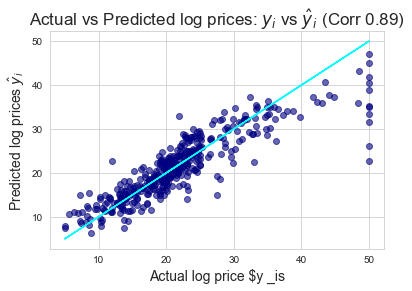

In [59]:
prices = np.log(data['PRICE'])
features = data.drop(['PRICE' , 'INDUS' , "AGE"] , axis = 1)
X_train , X_test , y_train , y_test = train_test_split(features , prices ,
                                                      test_size = 0.2 , random_state = 10)

# using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train , X_incl_const)
result = model.fit()

# Residuals
#residuals = y_train-result.fittedvalues

corr = round(y_train.corr(result.fittedvalues) , 2)
plt.scatter(x = np.e**y_train , y = np.e**result.fittedvalues , c = 'navy' , alpha = 0.6)
plt.plot(np.e**y_train , np.e**y_train , color = 'cyan')
plt.xlabel('Actual log price $y _is' , fontsize = 14)
plt.ylabel('Predicted log prices $\hat y _i$' , fontsize = 14)
plt.title(f'Actual vs Predicted log prices: $y _i$ vs $\hat y_i$ (Corr {corr})' , fontsize = 17)

Text(0, 0.5, 'Residuals')

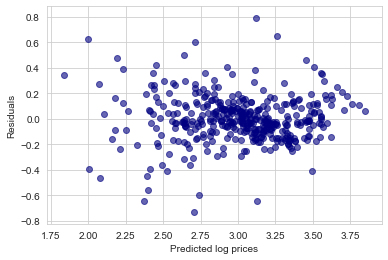

In [61]:

corr = round(y_train.corr(result.fittedvalues) , 2)
plt.scatter(x = result.fittedvalues , y = result.resid , c = 'navy' , alpha = 0.6)
plt.xlabel('Predicted log prices')
plt.ylabel('Residuals')